<a href="https://colab.research.google.com/github/thiagolopes97/ITA/blob/main/Aula2_RegLin_Log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Logo ITA" width="500" src="https://logodownload.org/wp-content/uploads/2018/01/ita-logo.png">

*Autor do material:* **Thiago Gonçalves Guimarães Lopes**

*Desenvovlido para a Disciplina:* **CT-600 Estágio Docência**

#### **Aula 2 - Regressão Linear e Regressão Logística**

---

# Fundamento da Regressão Linear e Logística

---

O modelo linear é uma modelo que utiliza commbinações lineares das características da base de dados. Este por sua vez é definindo como [1,2]:
$$\hat{f}(\mathbf{x},\mathbf{w})=w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n  $$
no qual $\hat{f}$ é a função aproximadora do método, $n$ o número de características, $w = (w_1 , ..., w_n )$ o vetor
com os coeficientes (ou pesos dos atributos) e $w_0$ é o termo escalar.

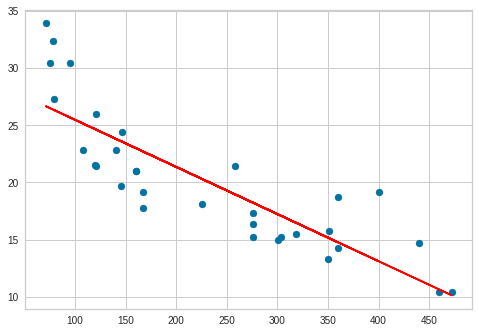


Existem diversos modelos lineares distintos, cada qual com sua especificidade e parâmetro distinto. Consultar [Linear Models](<https://scikit-learn.org/stable/modules/linear_model.html>) [2].

A qualidade de um estimador em fazer previsões é mediada por uma função de custo, que avalia o quão bem uma estimativa se aproxima do esperado [3,4]. A função
de custo é usada para aprimorar o modelo, que tende a minimizá-la [3]. 

Por mais que cada algoritmo possa possuir uma função de custo, em problemas de regressão geralmente ela está associada ao erro quadrático médio, representado abaixo [4]:
$$ MSE\left ( \hat{f} \right ) = \frac{1}{n} \sum_{i=1}^{n}\left ( y_i - \hat{f}(\mathbf{x}_i) \right )^2$$

no qual $n$ é o número de entradas do conjunto avaliado, $y_i$ é o valor real e $\hat{f}(\mathbf{x}_i)$ o valor previsto pelo modelo.

O $MSE$ está vinculado com o $RSME$, que é a medida de desempenho típica em problemas de regressão [3]. O $RSME$ é para quantificar os erros de um modelo de ML em suas previsões, dando um peso maior aos
grandes erros [1]. 
$$RMSE(\hat{f})=\sqrt{MSE(\hat{f})} $$

Outra medida de desempenho empregada nesta projeto é o coeficiente de determinação $R^2$, que representa a proporção de variância explicada pelas variáveis[3,4]. Assim, o $R^2$ explica o quão bem as amostras nunca vistas pelos modelos serão previstas por ele. A expressão abaixo representa como o $R^2$ é calculado normalmente:
$$R^{2}\left ( y, \hat{f} \right ) = 1 - \frac{\sum_{i=1}^{n}\left ( y_i - \hat{f}\left ( \mathbf{x}_i \right ) \right )^2}{\sum_{i=1}^{n}\left ( y_i - \overline{y} \right )^2}$$

no qual $\overline{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$.

Já na regressão logística o modelo calcula a soma ponderada das características de entrada e soma-os a um termo olarizador ($w_0$) [5]. Esta função calcula a probabilidade em formato de uma função logística. Matematicamente, este modelo é descrito por [1]:
$$ \hat{f}(\mathbf{x},\mathbf{w}) = \sigma (\mathbf{x}.\mathbf{w})$$

sendo $\mathbf{w}.\mathbf{x}$ é o produto escalar
entre o o vetor de pesos e de características e $\sigma$ a função logística descrita por $\sigma(x) = \frac{1}{1+e^{-x}}$.

**Referência:**
* [1] GÉRON, A. **Mãos à Obra Aprendizado de Máquina com Scikit-Learn e TensorFlow: Conceitos, ferramentas e técnicas para construção de sistemas inteligentes**. [S.l.]: Alta Books, 2019. Traduzido por Rafael Contatori. ISBN 9788550803814.
* [2] SCIKIT-LEARN. **Linear Models**. 2020. Disponível
em: <https://scikit-learn.org/stable/modules/linear_model.html>
* [3] BIGOTO, M. A. R. **Implementação de modelos de machine learning para predição de temperaturas críticas de supercondutores**. 2020. Disponível em: <https://github.com/muriloafonso/TG_ENG_FISICA>.
* [4] FACELI, K. et al. **Inteligência artificial: Uma abordagem de aprendizado de máquina**. 2011.
* [5] LOPES, T. G. G. **Análise comparativa de modelos de Machine Learning na predição de Câncer de pele**. 2020. Disponível em: <https://github.com/thiagolopes97/TCC-ThiagoLopes/blob/main/TCC_ThiagoLopes_Final.pdf>.

# Regressão Linear - Preço de casas em Boston

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline


# Normalmente as estruturas a serem analisadas veem em um formato CSV, EXCEL - Estes casos são mais fáceis de
# lidar e será mostrado seus procedimentos posteriormente.
dataset = load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [2]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
dataset.get('data')

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
# df = DataFrame
df = pd.DataFrame(dataset.get('data'))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Nomear as colunas do Dataframde
df.columns = dataset.get('feature_names')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Adicionar uma coluna ao Dataframe
df['target'] = dataset.get('target')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Separar os valores de atributo e alvo

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['target']

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
# Chamar a função do Modelo

LinReg = LinearRegression()
print(LinReg)
print(type(LinReg))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
<class 'sklearn.linear_model._base.LinearRegression'>


In [9]:
# Treinar o modelo

LinReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Preizer os valores de teste

y_pred = LinReg.predict(X_test)
print(y_pred)

[28.91931709 17.3246545  18.19061076 20.41054348 14.56910842 29.22170577
 32.78104349 17.83317437 21.12806877  6.10186903 28.80473349 24.1630096
 24.18767184  2.58002531 18.27439305 21.49597809 15.39292597 20.38381637
 29.0072802  17.04499449 22.1508892  23.00378132 22.42867459 22.27565657
 23.72748045 23.78120456 16.91785018 17.13688164 18.01748781 33.59015927
 36.19112302 20.89837189 33.24409114 16.38559422 11.36713802 20.22197264
 27.174642   22.78704055 23.91211001 21.17762221 20.39773423 30.41041392
 19.64964896 25.82693143 38.29358464  7.74432288 28.70128328  7.93893284
 23.11702461 25.2527036  39.02908038 12.87530083 17.01469811 24.04318023
 16.41739069 31.10110727 27.27671663 27.29215875 36.07328988 10.75068104
 28.14281784 25.14048098 17.16505804 14.82138684 21.68455759 11.6720897
 21.77998933 15.79933067 20.37947256 23.27048985 18.91500085 17.32577855
 16.43798614 17.25766922 20.30009959 19.86875922 20.36550195 28.05684214
 21.98837999 19.55730919 27.26898687 35.7950578  13.3

In [12]:
# Calcular as métricas do modelo

print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

MSE: 2.8972433509996804
RMSE: 14.701029289692404
R²: 0.7734643059987337


In [13]:
y_pred_total = LinReg.predict(X)

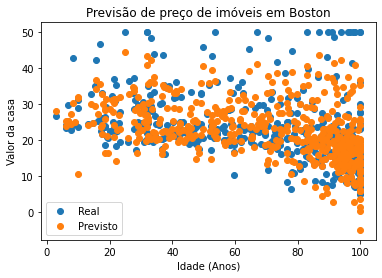

In [14]:
plt.scatter('AGE','target',data=df,label='Real')
plt.scatter(df['AGE'],y_pred_total,label='Previsto')
plt.xlabel('Idade (Anos)')
plt.ylabel('Valor da casa')
plt.title('Previsão de preço de imóveis em Boston')
plt.legend()

plt.show()


# Regressão Linear - Qualidade do Vinho

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/thiagolopes97/ITA/main/winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
